In [2]:
# 🧪 LOGISTIC REGRESSION IN PYTORCH
# ============================================
# GOAL: Classify 2D points as class 0 or 1 using logistic regression.
# We'll use a sigmoid output and binary cross-entropy loss.
# ============================================

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

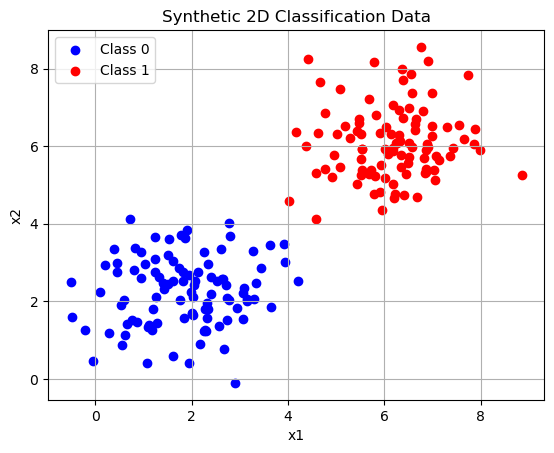

In [3]:
# STEP 1: GENERATE SYNTHETIC 2D CLASSIFICATION DATA

# Generate 100 points for each class
n_samples = 100

# Class 0: centered at (2, 2)
x0 = torch.randn(n_samples, 2) + torch.tensor([2.0, 2.0])
y0 = torch.zeros(n_samples, 1)

# Class 1: centered at (6, 6)
x1 = torch.randn(n_samples, 2) + torch.tensor([6.0, 6.0])
y1 = torch.ones(n_samples, 1)

# Combine the data
# cat() concatenates the tensors along the specified dimension, like numpy's concatenate
X = torch.cat([x0, x1], dim=0)  # shape (200, 2)
Y = torch.cat([y0, y1], dim=0)  # shape (200, 1)

# Plot the points
plt.scatter(x0[:, 0], x0[:, 1], color='blue', label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], color='red', label='Class 1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Synthetic 2D Classification Data")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# STEP 2: DEFINE LOGISTIC REGRESSION MODEL

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=2, out_features=1)  # 2D input, 1D output

    def forward(self, x):
        logits = self.linear(x)         # Linear transformation
        probs = torch.sigmoid(logits)   # Sigmoid squashes output to [0, 1]
        return probs

model = LogisticRegressionModel()
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [5]:
# STEP 3: DEFINE LOSS FUNCTION AND OPTIMIZER

# Binary cross-entropy is the standard for binary classification
loss_fn = nn.BCELoss()  # Binary Cross Entropy Loss

# SGD optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [6]:
# STEP 4: TRAINING LOOP

num_epochs = 200
loss_history = []

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    y_pred = model(X)               # predictions (after sigmoid)
    loss = loss_fn(y_pred, Y)       # compute BCE loss

    # Backward pass and optimization
    optimizer.zero_grad()           # reset gradients to zero
    loss.backward()                 # backpropagate
    optimizer.step()                # update parameters

    # Save and print loss
    loss_history.append(loss.item())
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss = {loss.item():.4f}")

Epoch 20/200, Loss = 0.4557
Epoch 40/200, Loss = 0.3947
Epoch 60/200, Loss = 0.3518
Epoch 80/200, Loss = 0.3193
Epoch 100/200, Loss = 0.2934
Epoch 120/200, Loss = 0.2720
Epoch 140/200, Loss = 0.2537
Epoch 160/200, Loss = 0.2380
Epoch 180/200, Loss = 0.2242
Epoch 200/200, Loss = 0.2121


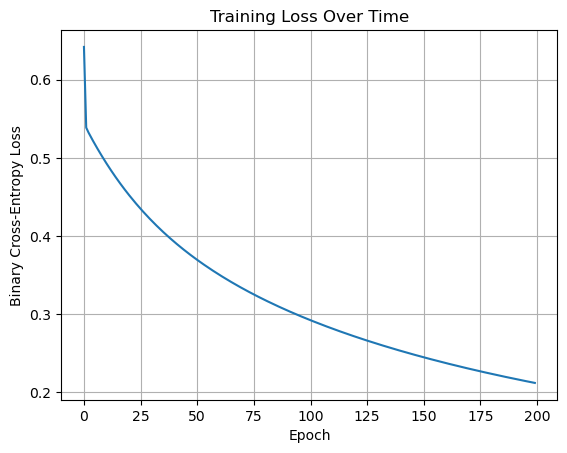

In [7]:
# STEP 5: PLOT LOSS CURVE

plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Training Loss Over Time")
plt.grid(True)
plt.show()

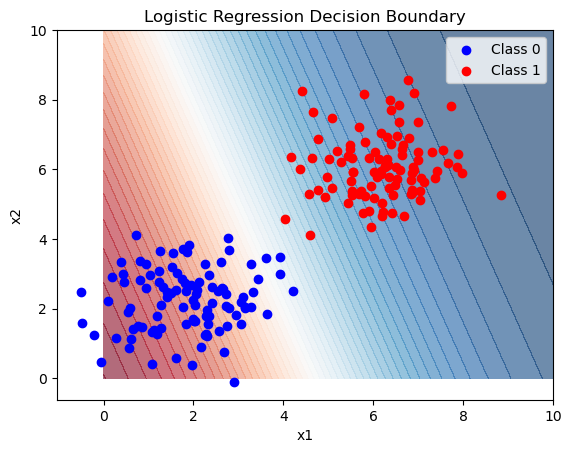

In [10]:
# STEP 6: VISUALIZE DECISION BOUNDARY

# Create a grid of (x1, x2) points to evaluate model's predictions
with torch.no_grad():
    x1_vals = torch.linspace(0, 10, 100)
    x2_vals = torch.linspace(0, 10, 100)
    xx1, xx2 = torch.meshgrid(x1_vals, x2_vals, indexing='ij')
    grid = torch.stack([xx1.flatten(), xx2.flatten()], dim=1)  # shape (10000, 2)
    preds = model(grid).reshape(xx1.shape)

# Plot decision boundary
plt.contourf(xx1, xx2, preds, levels=50, cmap="RdBu", alpha=0.6)
plt.scatter(x0[:, 0], x0[:, 1], color='blue', label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], color='red', label='Class 1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()

In [11]:
# STEP 7: MODEL OUTPUT INTERPRETATION

with torch.no_grad():
    sample = torch.tensor([[4.0, 4.0]])
    prob = model(sample)
    print(f"Predicted probability of being class 1: {prob.item():.4f}")

Predicted probability of being class 1: 0.6237
